In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Finding the highest top 10 paid teams

In [2]:
# Store filepath in a variable
salary_data = "Resources/Salaries.csv"
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
salary_data = pd.read_csv(salary_data, encoding="ISO-8859-1")
salary_data

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [3]:
#filter data by year
salary_df = salary_data [(1999 < salary_data["yearID"]) & (salary_data["yearID"] < 2021)]
salary_df

,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


In [4]:
#count amount of teams from 2010 - 2020
teams = salary_df["teamID"].nunique()
teams

33

In [8]:
#Change the name of columns needed
team_salary_df = salary_df[["teamID", "yearID", "playerID", "salary"]]
team_df = team_salary_df.rename(columns={"teamID":"Team", "yearID": "Year", "playerID":"Player", "salary": "Salary"})
team_df

,Team,Year,Player,Salary
12263,ANA,2000,anderga01,3250000
12264,ANA,2000,belchti01,4600000
12265,ANA,2000,botteke01,4000000
12266,ANA,2000,clemeed02,215000
12267,ANA,2000,colanmi01,200000
...,...,...,...,...
26423,WAS,2016,strasst01,10400000
26424,WAS,2016,taylomi02,524000
26425,WAS,2016,treinbl01,524900
26426,WAS,2016,werthja01,21733615


In [9]:
#Setting team as the index
teams_df = team_df.set_index("Team")
teams_df

,Year,Player,Salary
Team,,,
ANA,2000,anderga01,3250000
ANA,2000,belchti01,4600000
ANA,2000,botteke01,4000000
ANA,2000,clemeed02,215000
ANA,2000,colanmi01,200000
...,...,...,...
WAS,2016,strasst01,10400000
WAS,2016,taylomi02,524000
WAS,2016,treinbl01,524900


In [10]:
#Adding up the salary for each team
salary_group = teams_df.groupby(["Team"])['Salary'].sum()
salary_group.head()
team_salaries = pd.DataFrame({"Salary": salary_group})
sorted_salaries = team_salaries.sort_values("Salary", ascending=False)
sorted_salaries


,Salary
Team,
NYA,3139475917
BOS,2322549938
LAN,2171447418
PHI,1805658323
NYN,1797930388
DET,1788876300
SFN,1765391214
CHN,1701547495
SLN,1625629250


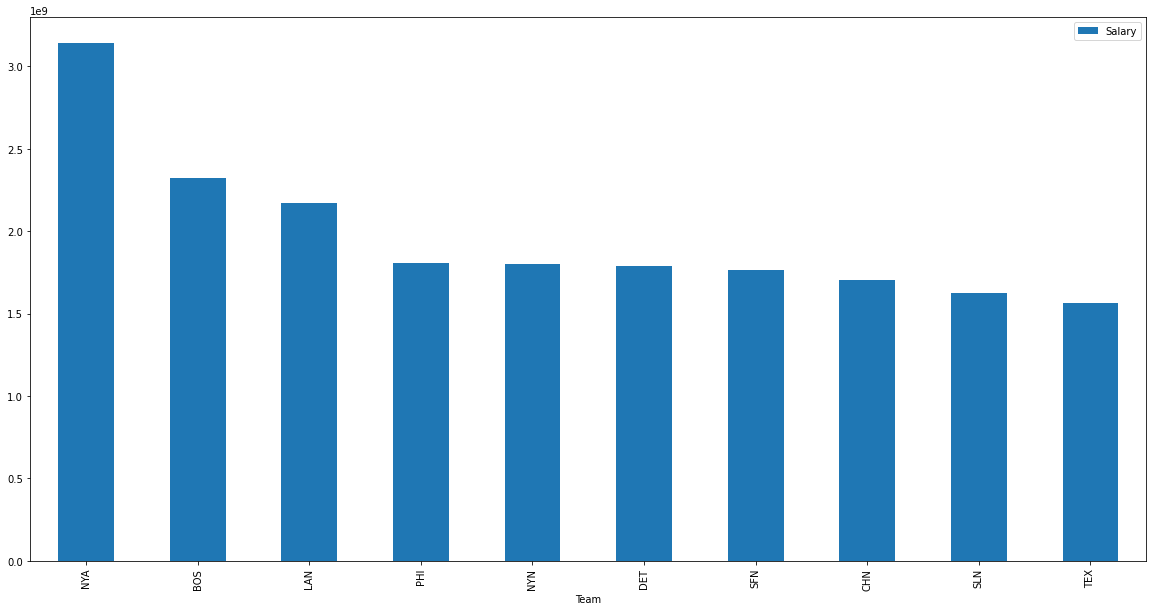

In [11]:
#Top 10 highest paid teams bar plot
sorted_salaries.head(10).plot(kind='bar', figsize=(20,10))
plt.show()

# Finding the teams with the most wins

In [12]:
# Store filepath in a variable
pitching_data = "Resources/Pitching.csv"
pitching_data = pd.read_csv(pitching_data, encoding="ISO-8859-1")
pitching_data

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,zamorda01,2019,1,NYN,NL,0,1,17,0,0,...,1.0,0,1.0,0,41.0,3,5,0.0,1.0,0.0
47624,zeuchtj01,2019,1,TOR,AL,1,2,5,3,0,...,0.0,2,0.0,0,99.0,0,13,0.0,0.0,1.0
47625,zimmejo02,2019,1,DET,AL,1,13,23,23,0,...,2.0,3,6.0,0,504.0,0,89,3.0,4.0,5.0
47626,zimmeky01,2019,1,KCA,AL,0,1,15,0,0,...,0.0,2,0.0,0,102.0,3,22,0.0,0.0,1.0


In [16]:
pitching_df = pitching_data [(1999 < pitching_data["yearID"]) & (pitching_data["yearID"] < 2021)]
pitching_df
pitching_df = pitching_df[["teamID", "W", "L"]]
wins_losses_df = pitching_df.rename(columns={"teamID":"Team", "W": "Wins", "L":"Losses"})
wins_losses_df
wins_losses_group = wins_losses_df.groupby(["Team"])['Wins','Losses'].sum()
wins_losses_group
most_wins = wins_losses_group.sort_values("Wins", ascending=False)
most_wins

C:\Users\april\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Wins,Losses
Team,,
NYA,1886,1350
SLN,1812,1427
BOS,1792,1447
LAN,1781,1459
ATL,1735,1502
OAK,1729,1509
SFN,1676,1561
CLE,1671,1567
PHI,1637,1602


In [14]:
#Merging Salaries & Wins
merge_df = pd.merge(sorted_salaries, most_wins, on="Team")
merge_df

,Salary,Wins,Losses
Team,,,
NYA,3139475917,1886,1350
BOS,2322549938,1792,1447
LAN,2171447418,1781,1459
PHI,1805658323,1637,1602
NYN,1797930388,1608,1630
DET,1788876300,1511,1726
SFN,1765391214,1676,1561
CHN,1701547495,1624,1614
SLN,1625629250,1812,1427


In [15]:
#Create line chart to show wins/losses with the 10 highest paid teams
teams = np.arange(0,130,10)
wins = [300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
losses = [300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]

ValueError: x and y must have same first dimension, but have shapes (13,) and (18,)

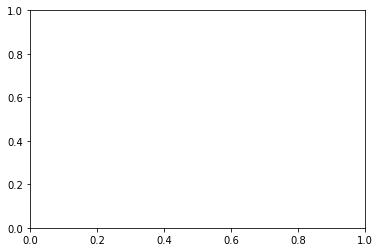

In [113]:
# Creating a line Plot to show wins/losses over time
team_wins, = plt.plot(time, wins, color="red", label="Danger Drop")
team_losses, = plt.plot(time, losses, color="blue", label="RailGun")
# plt.title("Coaster Speed Over Time")
# plt.xlabel("Coaster Runtime")
# plt.ylabel("Speed (MPH)")